<a href="https://colab.research.google.com/github/yunikurniatr/BrainTumorDetection/blob/main/TumorDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


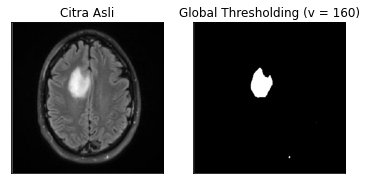

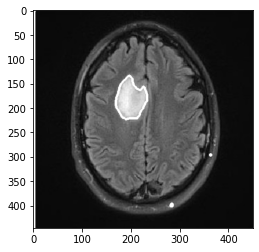

In [9]:
import cv2 as cv2
filename = ('/content/drive/MyDrive/PCVK/Brain Tumor/Y8.jpg')
img = cv2.imread(filename,0) 
blur = cv2. GaussianBlur (img, (5,5),0)

# mencari normalisasi histogram dan fungsi kumulatif distribusinya

hist = cv2.calcHist([blur],[0],None,[256], [0,256]) # CalcHist(image, accumulate=0, mask=NULL)
hist_norm = hist.ravel()/hist.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
thresh = -1 

# perulangan pencarian nilai pixel untuk histogram pada range 0-255
for i in range(0,255):
  wb += hist[i] # probabilities jumlah nilai pixel pada background
  wf = (img.shape[0]*img.shape[1]) - wb # kumulasi jumlah nilai pixel pada background
  sumb += (i*hist[i]) # i dunno ????

  # mencari nilai means dan nilai varians
  mb = sumb / wb #mean background
  mf = (sumb - sumb)/wf #mean foreground

  # menghitung fungsi minimalisasi
  betweenvar = wb * wf * (mb - mf) * (mb - mf) 
  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i 
x = ("Otsu's Thresholding (v = ")+str(thresh)+")" # ngeprint tulisan

# menemukan nilai ambang otsu threshold dengan fungsi opencv
ret, th1 = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (blur, thresh, 255, cv2. THRESH_BINARY)

# mendeteksi tepi gambar th1 dengan fungsi canny pada open cv
edged = cv.Canny(th1, 30, 200)

# mencari kontur 
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
  # countour = deteksi kontur
  # hierarcy = berisi informasi tentang topologi gambar, ada banyak elemen angka dari kontur
  # edged = gambar yang digunakan
  # cv.RETR_EXTERNAL = mode pengambilan kontur
  # cv.CHAIN_APPROX_NONE = mode perkiraan kontur

#menggambar kontur di gambar 'img'
cv.drawContours(img, contours, -1, (255,255,0), 3)

titles = ['Citra Asli', 'Global Thresholding (v = 160)', x] 
citra3 = [blur, th1]

#plt. figure(figsize = (10,10)) # hilangkan komen kanggo ngeset ukuran gambar

#nampilo gambar asli + hasil threshold
for i in range(len(citra3)):
    plt. subplot(1,2,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) 
plt.show()

#nampilo gambar garis kontur
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))